In [3]:
import numpy as np
import pandas_profiling
import pandas as pd
import sklearn

In [4]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
from sklearn.preprocessing import LabelEncoder

In [4]:
# Code to Measure time taken by program to execute.
import time

# store starting time
begin = time.time()

In [5]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Data Preparation

In [6]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

# not conbine well with label coding

df_total = df_total.drop('Animal_ID',1) #@@@@@@@
df_total = df_total.drop('Name',1)
df_total = df_total.drop('Date of Birth',1)
df_total = df_total.drop('DateTime_Intake',1)
df_total = df_total.drop('DateTime_Outcome',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)

df_total.info()

df_total = df_total.drop('Outcome_Type', axis = 1)
df_total = df_total.drop('Outcome_Subtype', axis = 1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_12424\2480897062.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Unnamed: 0',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_12424\2480897062.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Animal_ID',1) #@@@@@@@
C:\Users\diedr\AppData\Local\Temp\ipykernel_12424\2480897062.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Name',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_12424\2480897062.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Date of Birth',1)
C:\Users\diedr\AppData\Loca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Intake_type           109121 non-null  object 
 1   Intake_Condition      109121 non-null  object 
 2   Animal_Type           109121 non-null  object 
 3   Age_upon_Intake       109121 non-null  float64
 4   Mix_Breed             109121 non-null  object 
 5   Primary_Breed         109121 non-null  object 
 6   Secondary_Breed       109121 non-null  object 
 7   Main_Color            109121 non-null  object 
 8   Secondary_Color       109121 non-null  object 
 9   Outcome_Type          109121 non-null  object 
 10  Outcome_Subtype       109121 non-null  object 
 11  Age_upon_Outcome      109121 non-null  float64
 12  Sex                   109121 non-null  object 
 13  neuter/spay           109121 non-null  object 
 14  adopted/non-adopted   109121 non-null  object 
 15  

In [7]:
cols_num = ['Age_upon_Intake','Age_upon_Outcome','Days_in_shelter']
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total[cols_cat] = df_total[cols_cat].astype('category')
#col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
#df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Intake_type           109121 non-null  category
 1   Intake_Condition      109121 non-null  category
 2   Animal_Type           109121 non-null  category
 3   Age_upon_Intake       109121 non-null  float64 
 4   Mix_Breed             109121 non-null  category
 5   Primary_Breed         109121 non-null  category
 6   Secondary_Breed       109121 non-null  category
 7   Main_Color            109121 non-null  category
 8   Secondary_Color       109121 non-null  category
 9   Age_upon_Outcome      109121 non-null  float64 
 10  Sex                   109121 non-null  category
 11  neuter/spay           109121 non-null  category
 12  adopted/non-adopted   109121 non-null  category
 13  Days_in_shelter       109121 non-null  float64 
 14  Breed_size            109121 non-nul

# Cleaning target variable

In [8]:
df_total['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

['non-adopted', 'adopted', 'unknown']
Categories (3, object): ['adopted', 'non-adopted', 'unknown']

In [9]:
index_names = df_total[df_total['adopted/non-adopted'] == 2 ].index
index_names

Int64Index([], dtype='int64')

In [10]:
df_total.drop(index_names, inplace=True)

In [11]:
df_total['adopted/non-adopted'].unique()

['non-adopted', 'adopted', 'unknown']
Categories (3, object): ['adopted', 'non-adopted', 'unknown']

# Label Encoder

In [12]:
df_num = df_total.drop(cols_cat, axis=1)

In [13]:
df_cat = df_total.drop(cols_num, axis=1)

In [14]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_cat.columns:
    df_cat[i] = labelencoder.fit_transform(df_cat[i])

df_total = df_cat.join(df_num)
df_total

,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,adopted/non-adopted,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,1,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,0,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,0,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,1,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,0,1,4,3,3,0,9,4.000000,4.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,1,266,126,2,51,2,1,1,3,1,2,4,3,8,0.083333,0.08,0.0
109117,4,5,2,0,89,126,15,37,1,0,0,5,3,1,5,3,8,3.000000,3.00,0.0
109118,2,5,2,1,89,126,51,51,1,2,0,5,3,1,5,3,8,0.083333,0.17,0.0
109119,4,5,2,0,35,109,55,37,1,2,0,3,1,2,1,2,1,1.000000,1.00,5.0


X = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
X.head()

# Cleaning Target Variable

In [15]:
df_total['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

array([1, 0, 2])

In [16]:
index_names = df_total[df_total['adopted/non-adopted'] == 2 ].index
index_names

Int64Index([ 13869,  29677,  31621,  31898,  32860,  39609,  48814,  52620,
             54235,  57107,  72673,  74858,  75612,  79431,  90548,  93543,
             93795,  95675, 100101, 103241, 108841],
           dtype='int64')

In [17]:
df_total.drop(index_names, inplace=True)

In [18]:
df_total['adopted/non-adopted'].unique()

array([1, 0])

# Split

In [19]:
X = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
X.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_12424\488732468.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_total.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,1,4,3,3,0,9,4.000000,4.00,2.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Balancing 1 (under-sampling)

- This method work well when the data is substantial and relatively equal in the amount of data from each target class

In [21]:
y_train

76807    1
43782    0
14176    0
31617    1
66545    0
        ..
21244    0
45897    1
42619    0
43573    1
68278    1
Name: adopted/non-adopted, Length: 87280, dtype: int32

In [22]:
y_train.value_counts()

0    51559
1    35721
Name: adopted/non-adopted, dtype: int64

In [23]:
y.value_counts()

0    64338
1    44762
Name: adopted/non-adopted, dtype: int64

In [24]:
from imblearn.datasets import make_imbalance

X_train, y_train = make_imbalance(X_train, y_train, sampling_strategy={0: 30000, 1: 30000},random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train

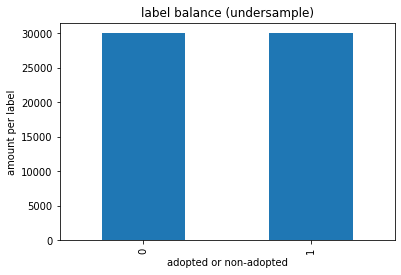

In [25]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()

# Model

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[11154,  1625],
       [ 1916,  7125]], dtype=int64)

In [30]:
print('Accuracy:', ac)

Accuracy: 0.837717690192484


# Classification Report

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12779
           1       0.81      0.79      0.80      9041

    accuracy                           0.84     21820
   macro avg       0.83      0.83      0.83     21820
weighted avg       0.84      0.84      0.84     21820



# Random Forest & K-fold Cross-validation

In [32]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.839 (0.007)


# Random Forest (number of trees)

>10 0.832 (0.008)
>100 0.838 (0.007)
>500 0.839 (0.006)
>1000 0.839 (0.006)
>3000 0.839 (0.007)


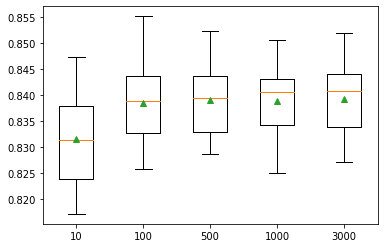

In [33]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 100, 500, 1000, 3000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_test, y_test):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_test, y_test)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Random Forest (Depth effect)

>1 0.790 (0.015)
>2 0.798 (0.008)
>3 0.808 (0.008)
>4 0.822 (0.008)
>5 0.837 (0.008)
>6 0.841 (0.006)
>7 0.843 (0.007)
>None 0.839 (0.008)


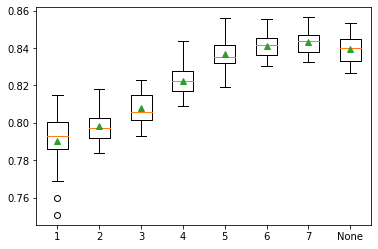

In [34]:
 # explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_test, y_test):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_test, y_test)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Log Loss

In [35]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier()
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.456 (0.021)


In [36]:
# program body ends

# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 342.77248334884644


# Randon Forest (selected Features)

# Code to Measure time taken by program to execute.
import time

# store starting time
begin2 = time.time()

In [88]:
df_total2 = pd.read_csv('df_total1.csv')
df_total2

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Data Preparation

('Intake_type',
 'Intake_Condition',
 'Animal_Type',
 'Primary_Breed',
 'Secondary_Breed',
 'Main_Color',
 'Secondary_Color',
 'Date of Birth',
 'Age_upon_Outcome',
 'Sex',
 'neuter/spay',
 'Days_in_shelter',
 'Barking_level')

# csv created this
df_total2 = df_total2.drop('Unnamed: 0',1)

# not conbine well with label coding

df_total2 = df_total2.drop('Animal_ID',1) #@@@@@@@
df_total2 = df_total2.drop('Name',1)
df_total2 = df_total2.drop('Date of Birth',1)
df_total2 = df_total2.drop('DateTime_Intake',1)
df_total2 = df_total2.drop('DateTime_Outcome',1)
df_total2 = df_total2.drop('Location',1)
df_total2 = df_total2.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)

df_total2.info()
# Multicolinearity
df_total2 = df_total2.drop('Outcome_Type', axis = 1)
df_total2 = df_total2.drop('Outcome_Subtype', axis = 1)

# Selected Features

In [89]:
df_total2 =  df_total2[['Intake_type',
           'Intake_Condition',
           'Animal_Type',
           'Primary_Breed',
 #          'Secondary_Breed',
#           'Main_Color',
#           'Secondary_Color',
#           'Date of Birth',
           'Age_upon_Outcome',
           'Sex',
           'neuter/spay',
           'Days_in_shelter',
           'Barking_level',
           'adopted/non-adopted',
                        'Age_upon_Intake']]

In [90]:
cols_num2 = ['Age_upon_Intake','Age_upon_Outcome','Days_in_shelter']
cols_cat2 = ['Intake_type','Intake_Condition','Primary_Breed','Sex','neuter/spay','Barking_level','adopted/non-adopted','Animal_Type']
df_total2[cols_cat2] = df_total2[cols_cat2].astype('category')
#col_d = ['Date of Birth']
#df_total2[col_d] = df_total2[col_d].astype('datetime64[ns]')
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Intake_type          109121 non-null  category
 1   Intake_Condition     109121 non-null  category
 2   Animal_Type          109121 non-null  category
 3   Primary_Breed        109121 non-null  category
 4   Age_upon_Outcome     109121 non-null  float64 
 5   Sex                  109121 non-null  category
 6   neuter/spay          109121 non-null  category
 7   Days_in_shelter      109121 non-null  float64 
 8   Barking_level        109121 non-null  category
 9   adopted/non-adopted  109121 non-null  category
 10  Age_upon_Intake      109121 non-null  float64 
dtypes: category(8), float64(3)
memory usage: 3.4 MB


C:\Users\diedr\AppData\Local\Temp\ipykernel_4124\1871221156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total2[cols_cat2] = df_total2[cols_cat2].astype('category')


# Label Encoder (features selected)

In [91]:
df_num2 = df_total2.drop(cols_cat2, axis=1)

In [92]:
df_cat2 = df_total2.drop(cols_num2, axis=1)

In [93]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_cat2.columns:
    df_cat2[i] = labelencoder.fit_transform(df_cat2[i])

df_total2 = df_cat2.join(df_num2)
df_total2

,Intake_type,Intake_Condition,Animal_Type,Primary_Breed,Sex,neuter/spay,Barking_level,adopted/non-adopted,Age_upon_Outcome,Days_in_shelter,Age_upon_Intake
0,4,5,2,35,1,2,1,1,2.00,4.0,2.000000
1,4,5,2,131,0,2,3,0,8.00,0.0,8.000000
2,4,5,2,32,1,2,4,0,1.00,6.0,0.916667
3,4,9,1,119,0,0,0,1,0.08,0.0,0.076660
4,4,5,2,116,1,2,3,0,4.00,2.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,266,2,1,4,1,0.08,0.0,0.083333
109117,4,5,2,89,1,0,5,0,3.00,0.0,3.000000
109118,2,5,2,89,1,2,5,0,0.17,0.0,0.083333
109119,4,5,2,35,1,2,1,0,1.00,5.0,1.000000


# Cleaning Target Variable (features selected)

In [94]:
df_total2['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

array([1, 0, 2])

In [95]:
index_names = df_total2[df_total2['adopted/non-adopted'] == 2 ].index
index_names

Int64Index([ 13869,  29677,  31621,  31898,  32860,  39609,  48814,  52620,
             54235,  57107,  72673,  74858,  75612,  79431,  90548,  93543,
             93795,  95675, 100101, 103241, 108841],
           dtype='int64')

In [96]:
df_total2.drop(index_names, inplace=True)

In [97]:
df_total2['adopted/non-adopted'].unique()

array([1, 0])

# Split (Feature Selected)

In [98]:
X2 = df_total2.drop('adopted/non-adopted', 1)
y2 = df_total2['adopted/non-adopted']
X2.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_4124\1996833785.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = df_total2.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Primary_Breed,Sex,neuter/spay,Barking_level,Age_upon_Outcome,Days_in_shelter,Age_upon_Intake
0,4,5,2,35,1,2,1,2.00,4.0,2.000000
1,4,5,2,131,0,2,3,8.00,0.0,8.000000
2,4,5,2,32,1,2,4,1.00,6.0,0.916667
3,4,9,1,119,0,0,0,0.08,0.0,0.076660
4,4,5,2,116,1,2,3,4.00,2.0,4.000000


In [99]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

# Balacing (Feature Selected)

In [100]:
y_train2

76807    1
43782    0
14176    0
31617    1
66545    0
        ..
21244    0
45897    1
42619    0
43573    1
68278    1
Name: adopted/non-adopted, Length: 87280, dtype: int32

In [101]:
y_train2.value_counts()

0    51559
1    35721
Name: adopted/non-adopted, dtype: int64

In [102]:
y2.value_counts()

0    64338
1    44762
Name: adopted/non-adopted, dtype: int64

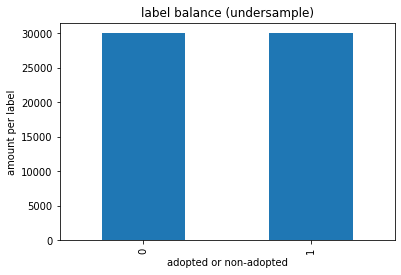

In [103]:

from imblearn.datasets import make_imbalance

X_train2, y_train2 = make_imbalance(X_train2, y_train2, sampling_strategy={0: 30000, 1: 30000}, random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train
y_train2.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()

# Model (Feature Selection)

In [104]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train2, y_train2)

RandomForestClassifier()

In [106]:
y_pred2 = classifier2.predict(X_test2)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test2, y_pred2)
ac2 = accuracy_score(y_test2,y_pred2)
cm2

array([[10786,  1993],
       [ 1870,  7171]], dtype=int64)

In [108]:
print('Accuracy:', ac2)

Accuracy: 0.8229605866177818


In [109]:
from sklearn.metrics import classification_report

report2 = classification_report(y_test2, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     12779
           1       0.78      0.79      0.79      9041

    accuracy                           0.82     21820
   macro avg       0.82      0.82      0.82     21820
weighted avg       0.82      0.82      0.82     21820

